# Projeto Redes

Alexandre Young

Bruno Cesconetto

Lucas Chen Alba

In [2]:
import freeman as fm
import networkx as nx
import scipy, pylab
import pandas as pd
import numpy as np

pd.options.display.min_rows = 90


In [26]:
# Rede two-mode (repos -> linguagens)

repo_g = fm.load('data/repos_langs.gml')
# Visualization
repo_g.set_all_nodes('size', (9))
repo_g.set_all_nodes('labpos', 'hover')

for n in repo_g.nodes:
    if (n.find('/') == -1):
        repo_g.nodes[n]['color'] = (0, 255, 0)
        repo_g.nodes[n]['size'] = (20)
    repo_g.nodes[n]['label'] = n
repo_g.move('bipartite', [n for n in repo_g.nodes if repo_g.nodes[n]['size'] != 20])
repo_g.draw()

In [8]:
# Rede one-mode (linguagens a partir dos repos)
onemode_repos_g = fm.load('data/repos_langs_onemode.gml')

# Visualization
onemode_repos_g.set_all_nodes('size', (15))
onemode_repos_g.set_all_nodes('labpos', 'hover')

for n in onemode_repos_g.nodes:
    onemode_repos_g.nodes[n]['label'] = n

onemode_repos_g.move('kamada_kawai')
onemode_repos_g.draw()

In [25]:
# onemode_repos_g.set_nodedata('repo_name', 'label')

onemode_repos_g.set_nodecol('betweenness', nx.betweenness_centrality(onemode_repos_g))
onemode_repos_g.set_nodecol('closeness', nx.closeness_centrality(onemode_repos_g))
onemode_repos_g.set_nodecol('degree', onemode_repos_g.degree)
onemode_repos_g.set_nodecol('eigen_vector', nx.eigenvector_centrality(onemode_repos_g))
# onemode_repos_g.set_node('year', onemode_repos_g['year'])


repo_df = onemode_repos_g.nodeframe


AttributeError: 'Graph' object has no attribute 'set_node'

In [29]:
repo_df.sort_values('betweenness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
7,Java,0.005545,0.173474,10,9.938323e-02
6,HTML,0.005307,0.277558,28,2.359034e-01
2,JavaScript,0.004069,0.268604,27,2.333722e-01
4,Shell,0.004069,0.268604,27,2.333722e-01
1,Python,0.004069,0.268604,27,2.333722e-01
15,Makefile,0.003533,0.260210,26,2.297038e-01
9,Dockerfile,0.002988,0.244904,24,2.169918e-01
8,CSS,0.001896,0.237907,23,2.149757e-01
24,C,0.001713,0.237907,23,2.184012e-01
12,Batchfile,0.001430,0.231298,23,2.178926e-01


In [30]:
repo_df.sort_values('closeness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
6,HTML,0.005307,0.277558,28,2.359034e-01
1,Python,0.004069,0.268604,27,2.333722e-01
2,JavaScript,0.004069,0.268604,27,2.333722e-01
4,Shell,0.004069,0.268604,27,2.333722e-01
15,Makefile,0.003533,0.260210,26,2.297038e-01
9,Dockerfile,0.002988,0.244904,24,2.169918e-01
24,C,0.001713,0.237907,23,2.184012e-01
8,CSS,0.001896,0.237907,23,2.149757e-01
3,C++,0.001425,0.237907,23,2.194611e-01
12,Batchfile,0.001430,0.231298,23,2.178926e-01


In [31]:
repo_df.sort_values('degree', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
6,HTML,0.005307,0.277558,28,2.359034e-01
1,Python,0.004069,0.268604,27,2.333722e-01
2,JavaScript,0.004069,0.268604,27,2.333722e-01
4,Shell,0.004069,0.268604,27,2.333722e-01
15,Makefile,0.003533,0.260210,26,2.297038e-01
9,Dockerfile,0.002988,0.244904,24,2.169918e-01
12,Batchfile,0.001430,0.231298,23,2.178926e-01
24,C,0.001713,0.237907,23,2.184012e-01
8,CSS,0.001896,0.237907,23,2.149757e-01
3,C++,0.001425,0.237907,23,2.194611e-01


In [32]:
# Rede two-mode (devs -> linguagens)
dev_g = fm.load('data/devs_langs.gml')
# Visualization
dev_g.set_all_nodes('size', (9))
dev_g.set_all_nodes('labpos', 'hover')

for n in dev_g.nodes:
    if (n.find('/') != -1):
        dev_g.nodes[n]['color'] = (0, 255, 0)
        dev_g.nodes[n]['size'] = (20)
    dev_g.nodes[n]['label'] = n
dev_g.move('bipartite', [n for n in dev_g.nodes if dev_g.nodes[n]['size'] != 20])
dev_g.draw()

In [12]:
# Rede one-mode (linguagens a partir dos devs)

onemode_devs_g = fm.load('data/devs_langs_onemode.gml')

# Visualization
onemode_devs_g.set_all_nodes('size', (15))
onemode_devs_g.set_all_nodes('labpos', 'hover')

for n in onemode_devs_g.nodes:
    onemode_devs_g.nodes[n]['label'] = n

# onemode_devs_g.move('bipartite', [n for n in onemode_devs_g.nodes if onemode_devs_g.nodes[n]['size'] != 20])
onemode_devs_g.move('kamada_kawai')

onemode_devs_g.draw()

In [13]:
onemode_devs_g.set_nodecol('betweenness', nx.betweenness_centrality(onemode_devs_g))
onemode_devs_g.set_nodecol('closeness', nx.closeness_centrality(onemode_devs_g))
onemode_devs_g.set_nodecol('degree', onemode_devs_g.degree)
onemode_devs_g.set_nodecol('eigen_vector', nx.eigenvector_centrality(onemode_devs_g))

dev_df = onemode_devs_g.nodeframe



In [35]:
dev_df.sort_values('betweenness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
1,Python,0.036586,0.772401,78,2.147127e-01
4,Shell,0.031064,0.718513,72,1.927041e-01
15,Makefile,0.026100,0.657363,64,1.649556e-01
6,HTML,0.025736,0.694293,69,1.875706e-01
8,CSS,0.025365,0.686579,68,1.837337e-01
12,Batchfile,0.022312,0.643667,62,1.661465e-01
2,JavaScript,0.020990,0.637032,61,1.611538e-01
3,C++,0.019213,0.650443,63,1.771053e-01
9,Dockerfile,0.016510,0.588496,53,1.431441e-01
24,C,0.014840,0.624162,59,1.708586e-01


In [36]:
dev_df.sort_values('closeness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
1,Python,0.036586,0.772401,78,2.147127e-01
4,Shell,0.031064,0.718513,72,1.927041e-01
6,HTML,0.025736,0.694293,69,1.875706e-01
8,CSS,0.025365,0.686579,68,1.837337e-01
15,Makefile,0.026100,0.657363,64,1.649556e-01
3,C++,0.019213,0.650443,63,1.771053e-01
12,Batchfile,0.022312,0.643667,62,1.661465e-01
2,JavaScript,0.020990,0.637032,61,1.611538e-01
24,C,0.014840,0.624162,59,1.708586e-01
17,Objective-C,0.013453,0.624162,59,1.756455e-01


In [37]:
dev_df.sort_values('degree', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
1,Python,0.036586,0.772401,78,2.147127e-01
4,Shell,0.031064,0.718513,72,1.927041e-01
6,HTML,0.025736,0.694293,69,1.875706e-01
8,CSS,0.025365,0.686579,68,1.837337e-01
15,Makefile,0.026100,0.657363,64,1.649556e-01
3,C++,0.019213,0.650443,63,1.771053e-01
12,Batchfile,0.022312,0.643667,62,1.661465e-01
2,JavaScript,0.020990,0.637032,61,1.611538e-01
24,C,0.014840,0.624162,59,1.708586e-01
17,Objective-C,0.013453,0.624162,59,1.756455e-01


In [38]:
repo_df = repo_df.sort_values('id', ascending=1)
repo_df

,id,betweenness,closeness,degree,eigen_vector
89,1C Enterprise,0.000000,0.000000,0,4.259209e-12
73,ANTLR,0.000000,0.000000,0,4.259209e-12
67,ASP,0.000000,0.000000,0,4.259209e-12
97,ActionScript,0.000000,0.000000,0,4.259209e-12
98,ApacheConf,0.000000,0.000000,0,4.259209e-12
55,AppleScript,0.000000,0.000000,0,4.259209e-12
38,Assembly,0.000000,0.154199,5,5.449875e-02
95,AutoHotkey,0.000000,0.000000,0,4.259209e-12
42,Awk,0.000000,0.000000,0,4.259209e-12
12,Batchfile,0.001430,0.231298,23,2.178926e-01


In [39]:
dev_df = dev_df.sort_values('id', ascending=1)
dev_df

,id,betweenness,closeness,degree,eigen_vector
89,1C Enterprise,0.000975,0.468122,26,9.399864e-02
73,ANTLR,0.000284,0.461135,24,8.707516e-02
67,ASP,0.000888,0.454354,22,8.201003e-02
97,ActionScript,0.000446,0.468122,26,9.631687e-02
98,ApacheConf,0.000446,0.468122,26,9.631687e-02
55,AppleScript,0.000539,0.438242,17,6.716808e-02
38,Assembly,0.001098,0.482751,30,1.090739e-01
95,AutoHotkey,0.000446,0.468122,26,9.631687e-02
42,Awk,0.000498,0.429112,14,4.392022e-02
12,Batchfile,0.022312,0.643667,62,1.661465e-01


/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



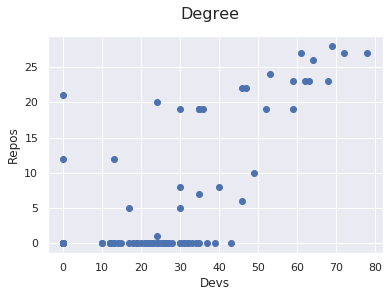

In [78]:
ax = pylab.subplot(111)
# dev_df['degree'] = np.log(dev_df.degree)
ax.scatter(dev_df['degree'], repo_df['degree'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
pylab.suptitle('Degree', fontsize=16)
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



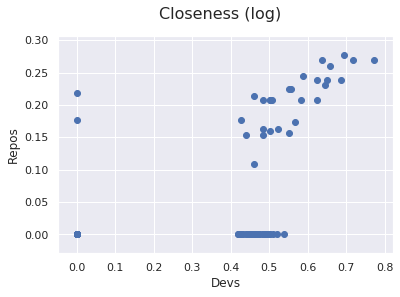

In [77]:
ax = pylab.subplot(111)
ax.scatter(dev_df['closeness'], repo_df['closeness'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
pylab.suptitle('Closeness (log)', fontsize=16)
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



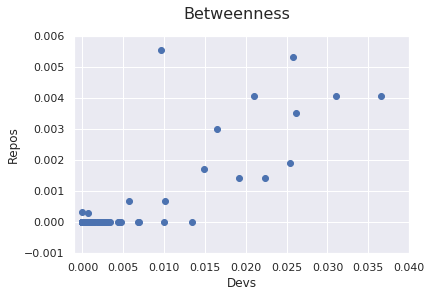

In [86]:
ax = pylab.subplot(111)
ax.scatter(dev_df['betweenness'], repo_df['betweenness'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
pylab.suptitle('Betweenness', fontsize=16)
ax.set_xlim([-0.001, 0.04])
ax.set_ylim([-0.001, 0.006])
ax.figure.show()



/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



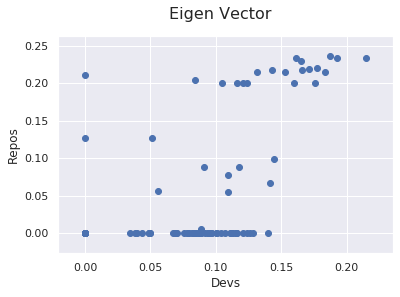

In [75]:
ax = pylab.subplot(111)
ax.scatter(dev_df['eigen_vector'], repo_df['eigen_vector'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
pylab.suptitle('Eigen Vector', fontsize=16)
ax.figure.show()

In [44]:
bet_df = pd.DataFrame()
bet_df['id'] = repo_df['id']
bet_df['betweenness_repo'] = repo_df['betweenness']
bet_df['betweenness_dev'] = dev_df['betweenness']


bet_df.sort_values('betweenness_repo', ascending=0)

,id,betweenness_repo,betweenness_dev
7,Java,0.005545,0.009577
6,HTML,0.005307,0.025736
1,Python,0.004069,0.036586
4,Shell,0.004069,0.031064
2,JavaScript,0.004069,0.020990
15,Makefile,0.003533,0.026100
9,Dockerfile,0.002988,0.016510
8,CSS,0.001896,0.025365
24,C,0.001713,0.014840
12,Batchfile,0.001430,0.022312


In [45]:
clos_df = pd.DataFrame()
clos_df['id'] = repo_df['id']
clos_df['closeness_repo'] = repo_df['closeness']
clos_df['closeness_dev'] = dev_df['closeness']


clos_df.sort_values('closeness_repo', ascending=0)

,id,closeness_repo,closeness_dev
6,HTML,0.277558,0.694293
1,Python,0.268604,0.772401
4,Shell,0.268604,0.718513
2,JavaScript,0.268604,0.637032
15,Makefile,0.260210,0.657363
9,Dockerfile,0.244904,0.588496
8,CSS,0.237907,0.686579
24,C,0.237907,0.624162
3,C++,0.237907,0.650443
12,Batchfile,0.231298,0.643667


In [46]:
deg_df = pd.DataFrame()
deg_df['id'] = repo_df['id']
deg_df['degree_repo'] = repo_df['degree']
deg_df['degree_dev'] = dev_df['degree']

deg_df.sort_values('degree_repo', ascending=0)

,id,degree_repo,degree_dev
6,HTML,28,69
4,Shell,27,72
2,JavaScript,27,61
1,Python,27,78
15,Makefile,26,64
9,Dockerfile,24,53
12,Batchfile,23,62
8,CSS,23,68
24,C,23,59
3,C++,23,63


In [111]:
deg_df = pd.DataFrame()
deg_df['id'] = repo_df['id']
deg_df['eig_repo'] = repo_df['eigen_vector']
deg_df['eig_dev'] = dev_df['eigen_vector']

deg_df.sort_values('eig_dev', ascending=0)

,id,eig_repo,eig_dev
1,Python,2.333722e-01,2.147127e-01
4,Shell,2.333722e-01,1.927041e-01
6,HTML,2.359034e-01,1.875706e-01
8,CSS,2.149757e-01,1.837337e-01
3,C++,2.194611e-01,1.771053e-01
17,Objective-C,1.995380e-01,1.756455e-01
24,C,2.184012e-01,1.708586e-01
12,Batchfile,2.178926e-01,1.661465e-01
15,Makefile,2.297038e-01,1.649556e-01
2,JavaScript,2.333722e-01,1.611538e-01


/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



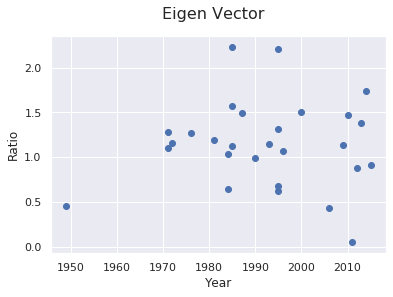

In [50]:
dev_ord_id = dev_df.sort_values('id', ascending=0)
repo_ord_id = repo_df.sort_values('id', ascending=0)

lang_year = {}
for n in onemode_repos_g.nodes:
    try:
        lang_year[onemode_repos_g.nodes[n]['label']] = onemode_repos_g.nodes[n]['year']
    except:
        pass

langs_eig_vec_ratio = []
for i in range(len(repo_df)):
    if((repo_ord_id['degree'][i] > 0) and (dev_ord_id['degree'][i] > 0)):
        langs_eig_vec_ratio.append([((repo_ord_id['eigen_vector'][i] / max(repo_ord_id['eigen_vector'])) / (dev_ord_id['eigen_vector'][i] / max(dev_ord_id['eigen_vector']))), dev_ord_id['id'][i], lang_year[dev_ord_id['id'][i]]])

lang_eig_ratio_df = pd.DataFrame()
lang_eig_ratio_df['id'] = [lang[1] for lang in langs_eig_vec_ratio]
lang_eig_ratio_df['ratio'] = [lang[0] for lang in langs_eig_vec_ratio]
lang_eig_ratio_df['year'] = [lang[2] for lang in langs_eig_vec_ratio]


ax = pylab.subplot(111)
ax.scatter(lang_eig_ratio_df['year'], lang_eig_ratio_df['ratio'])
pylab.xlabel('Year')
pylab.ylabel('Ratio')
pylab.suptitle('Eigen Vector', fontsize=16)
ax.figure.show()

Possíveis hipóteses:


H1: Linguagens criadas na década de 90 terão maior influência sobre outras linguagens em repositórios com muitos contribuidores

H1: Linguagens mais populares dentre os profissionais serão mais influentes em repositórios com muitos contribuidores


___H1: Linguagens terão uma proporção de influência dependente do seu ano de criação___

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



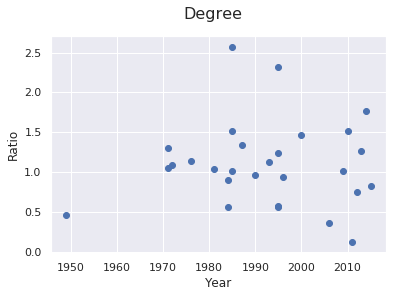

In [44]:
langs_deg_ratio = []
for i in range(len(repo_df)):
    if((repo_ord_id['degree'][i] > 0) and (dev_ord_id['degree'][i] > 0)):
        langs_deg_ratio.append([((repo_ord_id['degree'][i] / max(repo_ord_id['degree'])) / (dev_ord_id['degree'][i] / max(dev_ord_id['degree']))), dev_ord_id['id'][i], lang_year[dev_ord_id['id'][i]]])

lang_deg_ratio_df = pd.DataFrame()
lang_deg_ratio_df['id'] = [lang[1] for lang in langs_deg_ratio]
lang_deg_ratio_df['ratio'] = [lang[0] for lang in langs_deg_ratio]
lang_deg_ratio_df['year'] = [lang[2] for lang in langs_deg_ratio]


ax = pylab.subplot(111)
ax.scatter(lang_deg_ratio_df['year'], lang_deg_ratio_df['ratio'])
pylab.xlabel('Year')
pylab.ylabel('Ratio')
pylab.suptitle('Degree', fontsize=16)
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



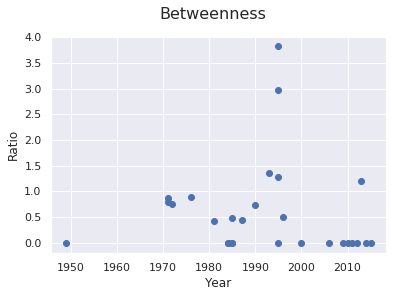

In [48]:
langs_bet_ratio = []
for i in range(len(repo_df)):
    if((repo_ord_id['degree'][i] > 0) and (dev_ord_id['degree'][i] > 0)):
        langs_bet_ratio.append([((repo_ord_id['betweenness'][i] / max(repo_ord_id['betweenness'])) / (dev_ord_id['betweenness'][i] / max(dev_ord_id['betweenness']))), dev_ord_id['id'][i], lang_year[dev_ord_id['id'][i]]])

lang_bet_ratio_df = pd.DataFrame()
lang_bet_ratio_df['id'] = [lang[1] for lang in langs_bet_ratio]
lang_bet_ratio_df['ratio'] = [lang[0] for lang in langs_bet_ratio]
lang_bet_ratio_df['year'] = [lang[2] for lang in langs_bet_ratio]


ax = pylab.subplot(111)
ax.scatter(lang_bet_ratio_df['year'], lang_bet_ratio_df['ratio'])
pylab.xlabel('Year')
pylab.ylabel('Ratio')
pylab.suptitle('Betweenness', fontsize=16)
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



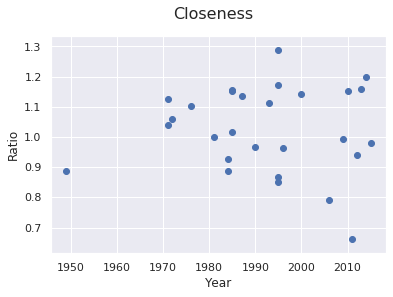

In [49]:
langs_clos_ratio = []
for i in range(len(repo_df)):
    if((repo_ord_id['degree'][i] > 0) and (dev_ord_id['degree'][i] > 0)):
        langs_clos_ratio.append([((repo_ord_id['closeness'][i] / max(repo_ord_id['closeness'])) / (dev_ord_id['closeness'][i] / max(dev_ord_id['closeness']))), dev_ord_id['id'][i], lang_year[dev_ord_id['id'][i]]])

lang_clos_ratio_df = pd.DataFrame()
lang_clos_ratio_df['id'] = [lang[1] for lang in langs_clos_ratio]
lang_clos_ratio_df['ratio'] = [lang[0] for lang in langs_clos_ratio]
lang_clos_ratio_df['year'] = [lang[2] for lang in langs_clos_ratio]


ax = pylab.subplot(111)
ax.scatter(lang_clos_ratio_df['year'], lang_clos_ratio_df['ratio'])
pylab.xlabel('Year')
pylab.ylabel('Ratio')
pylab.suptitle('Closeness', fontsize=16)
ax.figure.show()